¡Hola!

Mi nombre es Tonatiuh Cruz. Me complace revisar tu proyecto hoy.

Al identificar cualquier error inicialmente, simplemente los destacaré. Te animo a localizar y abordar los problemas de forma independiente como parte de tu preparación para un rol como data-scientist. En un entorno profesional, tu líder de equipo seguiría un enfoque similar. Si encuentras la tarea desafiante, proporcionaré una pista más específica en la próxima iteración.

Encontrarás mis comentarios a continuación - **por favor no los muevas, modifiques o elimines**.

Puedes encontrar mis comentarios en cajas verdes, amarillas o rojas como esta:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Éxito. Todo está hecho correctamente.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Observaciones. Algunas recomendaciones.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Necesita corrección. El bloque requiere algunas correcciones. El trabajo no puede ser aceptado con comentarios en rojo.
</div>

Puedes responderme utilizando esto:

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>

# ¿Cuál es la mejor tarifa?

Trabajas como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de las tarifas genera más ingresos para poder ajustar el presupuesto de publicidad.

Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.


[Antes de sumergirte en el análisis de datos, explica por tu propia cuenta el propósito del proyecto y las acciones que planeas realizar.]



1. Espero poner en practica todo lo aprendido, estoy bastante nerviosa en la parte de estadistica porque siento que no lo comprendi lo suficientemente bien, pero espero que este proyecto me ayude aclarar dudas del tema. 





[Ten en cuenta que estudiar, modificar y analizar datos es un proceso iterativo. Es normal volver a los pasos anteriores y corregirlos/ampliarlos para permitir nuevos pasos.]

## Inicialización

In [1]:
# Cargar todas las librerías
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import ttest_ind, levene
import os                            

os.getcwd() 

'/home/jovyan/work'

## Cargar datos

In [2]:
# Carga los archivos de datos en diferentes DataFrames
megaline_calls = pd.read_csv('/home/jovyan/work/Sprint4/megaline_calls.csv')
megaline_internet = pd.read_csv('/home/jovyan/work/Sprint4/megaline_internet.csv')
megaline_messages = pd.read_csv('/home/jovyan/work/Sprint4/megaline_messages.csv')
megaline_plans = pd.read_csv('/home/jovyan/work/Sprint4/megaline_plans.csv')
megaline_users = pd.read_csv('/home/jovyan/work/Sprint4/megaline_users.csv')

## Preparar los datos

In [3]:
#Redondear las llamadas hacia arriba.
megaline_calls['duration'] =  megaline_calls['duration'].apply(np.ceil)

#Redondear las megabytes hacia arriba.
megaline_internet['mb_used'] = megaline_internet['mb_used'].apply(np.ceil)



## Tarifas

In [4]:
# Imprime la información general/resumida sobre el DataFrame de las tarifas
megaline_plans.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [5]:
# Imprime una muestra de los datos para las tarifas
display(megaline_plans.head())


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


La tabla **megaline_plans** contiene 8 columnas, todos los nombres siguen las buenas practicas. Tenemos 2 datos. No existen valores ausentes.

- messages_included: tipo int64, no parece tener problemas.
- mb_per_month_included: tipo int64, no parece tener problemas.
- minutes_included: tipo int64, no parece tener problemas.
- usd_monthly_pay: tipo int64,  parece tener problemas deberia ser float64 porque la moneda si carga decimal.
- usd_per_gb: tipo int64, parece tener problemas deberia ser float64 porque la moneda si carga decimal.
- usd_per_message: tipo float64, no parece tener problemas.
- usd_per_minute: tipo float64, no parece tener problemas.
- plan_name: tipo object, no parece tener problemas.


### Corregir datos

In [6]:
## Convertir los usd_monthly_pay y usd_per_gb de int64 a float64
megaline_plans['usd_monthly_pay'] = megaline_plans['usd_monthly_pay'].astype('float64')
megaline_plans['usd_per_gb'] = megaline_plans['usd_per_gb'].astype('float64')



### Enriquecer los datos

In [7]:
## Cambiar plan_name por solo plan para que pueda usarse a futuro con un merge
megaline_plans.rename(columns = {'plan_name':'plan'}, inplace = True)

## Agregar una columna de gb_per_month_included. Recuerda un 1GB = 1024MB
megaline_plans['gb_per_month_included'] = megaline_plans['mb_per_month_included'] / 1024

## Ordenar las columnas del dataframe
megaline_plans = megaline_plans[['plan',
                                 'minutes_included',
                                 'messages_included', 
                                 'mb_per_month_included',
                                 'gb_per_month_included',
                                 'usd_monthly_pay',
                                 'usd_per_minute',
                                 'usd_per_message',
                                 'usd_per_gb' ]]

## Mostrar cambios
display(megaline_plans.head())



,plan,minutes_included,messages_included,mb_per_month_included,gb_per_month_included,usd_monthly_pay,usd_per_minute,usd_per_message,usd_per_gb
0,surf,500,50,15360,15.0,20.0,0.03,0.03,10.0
1,ultimate,3000,1000,30720,30.0,70.0,0.01,0.01,7.0


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Muy buen trabajo!! Es correcto considerar que 1024 megabytes son 1 gigabytes.
    
</div>

## Usuarios/as

In [8]:
# Imprime la información general/resumida sobre el DataFrame de usuarios
megaline_users.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [9]:
# Imprime una muestra de datos para usuarios
display(megaline_users.head())



,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


La tabla **megaline_users** contiene 8 columnas, todos los nombres siguen las buenas practicas. Tenemos 500 datos.  Existen valores ausentes en la columna de churn_date pero son datos irrelevantes. Solo significa que el cliente sigue usando nuestro plan. 

- user_id: tipo int64, deberia ser object ya que es una variable de identificación.
- first_name: tipo object, no parece tener problemas.
- last_name: tipo object, no parece tener problemas.
- age: tipo int64, no parece tener problemas.
- city: tipo object, no parece tener problemas.
- reg_date: tipo object, deberia ser datetime.
- plan: tipo object, no parece tener problemas.
- churn_date: tipo object, deberia ser datetime.


### Corregir los datos

In [10]:
## Convertir los id de usuarios a object
megaline_users['user_id'] = megaline_users['user_id'].astype('object')

## Convertir las fechas a tipo datetime
megaline_users['reg_date'] = pd.to_datetime(megaline_users['reg_date'], format='%Y-%m-%d')
megaline_users['churn_date'] = pd.to_datetime(megaline_users['churn_date'], format='%Y-%m-%d')


### Enriquecer los datos

In [11]:
## Agregar una columna del estado, dividiendo la cadena de city en función de la coma y seleccionando el último elemento 
megaline_users['state'] = megaline_users['city'].str.split(',').str[-1].str.strip()
megaline_users['state'] = megaline_users['state'].str.split(' ').str[-2].str.strip()


## Ordenar las columnas del dataframe
megaline_users = megaline_users[['user_id',
                                 'first_name',
                                 'last_name', 
                                 'age',
                                 'city',
                                 'state',
                                 'plan',
                                 'reg_date',
                                 'churn_date']]

## Mostrar cambios
display(megaline_users.head())


,user_id,first_name,last_name,age,city,state,plan,reg_date,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",GA,ultimate,2018-12-24,NaT
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",WA,surf,2018-08-13,NaT
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",NV,surf,2018-10-21,NaT
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",OK,surf,2018-01-28,NaT
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",WA,surf,2018-05-23,NaT


## Llamadas

In [12]:
# Imprime la información general/resumida sobre el DataFrame de las llamadas
megaline_calls.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [13]:
# Imprime una muestra de datos para las llamadas
display(megaline_calls.head())



,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,9.0
1,1000_145,1000,2018-12-27,14.0
2,1000_247,1000,2018-12-27,15.0
3,1000_309,1000,2018-12-28,6.0
4,1000_380,1000,2018-12-30,5.0


La tabla **megaline_calls** contiene 4 columnas, todos los nombres siguen las buenas practicas. Tenemos 137735 datos. No existen valores ausentes.

- id: tipo object, no parece tener problemas.
- user_id: tipo int64, deberia ser object ya que es una variable de identificación.
- call_date: tipo object, deberia ser datetime.
- duration: tipo float64, deberia ser int64 ya que no se cuentan los segundos.

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [14]:
## Convertir los id de usuarios a object
megaline_calls['user_id'] = megaline_calls['user_id'].astype('object')

## Convertir las fechas a tipo datetime
megaline_calls['call_date'] = pd.to_datetime(megaline_calls['call_date'], format = '%Y-%m-%d')

## Convertir la duracion de los minutos de en enteros int64 aplicando la funcion de ceil en la columna duration
megaline_calls['duration'] = np.ceil(megaline_calls['duration']).astype('int64')


### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [15]:
## Renombrar la columna de id & duration 
megaline_calls.rename(columns={'id': 'call_id',
                              'duration': 'call_duration'}, inplace=True)

## Agregar la columna del mes.
megaline_calls['month'] = megaline_calls['call_date'].dt.month

## Ordenar las columnas del dataframe
megaline_calls = megaline_calls[['user_id',
                                 'call_id',
                                 'call_date',
                                 'month',
                                 'call_duration']]

## Mostrar cambios
display(megaline_calls.head())


,user_id,call_id,call_date,month,call_duration
0,1000,1000_93,2018-12-27,12,9
1,1000,1000_145,2018-12-27,12,14
2,1000,1000_247,2018-12-27,12,15
3,1000,1000_309,2018-12-28,12,6
4,1000,1000_380,2018-12-30,12,5


<div class="alert alert-block alert-warning">
<b>Comentario Revisor</b> <a class="tocSkip"></a>

Qué podríamos decir hasta el momento de las llamadas que tienen una duración de 0?
</div>

<div class="alert alert-block alert-info">
<b>En las llamadas con duracion de 0, el usuario no realizo ni una sola llamada, ni siquiera de un segundo.</b> <a class="tocSkip"></a>

## Mensajes

In [16]:
# Imprime la información general/resumida sobre el DataFrame de los mensajes
megaline_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [17]:
# Imprime una muestra de datos para los mensajes
display(megaline_messages.head())

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


La tabla **megaline_messages** contiene 3 columnas, todos los nombres siguen las buenas practicas. Tenemos 76051 datos. No existen valores ausentes.

- id: tipo object, no parece tener problemas.
- user_id: tipo int64, deberia ser object ya que es una variable de identificación.
- message_date: tipo object, deberia ser datetime.


### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [18]:
## Convertir los id de usuarios a object
megaline_messages['user_id'] = megaline_messages['user_id'].astype('object')

## Convertir las fechas a tipo datetime
megaline_messages['message_date'] = pd.to_datetime(megaline_messages['message_date'], format='%Y-%m-%d')

### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [19]:
## Renombrar la columna de id  
megaline_messages.rename(columns={'id': 'message_id'}, inplace=True)

## Agregar una columna del mes
megaline_messages['month'] = megaline_messages['message_date'].dt.month

## Ordenar las columnas del dataframe
megaline_messages = megaline_messages[['user_id',
                                 'message_id',
                                 'message_date',
                                 'month']]

## Mostrar cambios
display(megaline_messages.head())


,user_id,message_id,message_date,month
0,1000,1000_125,2018-12-27,12
1,1000,1000_160,2018-12-31,12
2,1000,1000_223,2018-12-31,12
3,1000,1000_251,2018-12-27,12
4,1000,1000_255,2018-12-26,12


## Internet

In [20]:
# Imprime la información general/resumida sobre el DataFrame de internet
megaline_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [21]:
# Imprime una muestra de datos para el tráfico de internet
display(megaline_internet.head())

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,90.0
1,1000_204,1000,2018-12-31,0.0
2,1000_379,1000,2018-12-28,661.0
3,1000_413,1000,2018-12-26,271.0
4,1000_442,1000,2018-12-27,881.0


La tabla **megaline_internet** contiene 4 columnas, todos los nombres siguen las buenas practicas. Tenemos 104825 datos. No existen valores ausentes.

- id: tipo object, no parece tener problemas.
- user_id: tipo int64, deberia ser object ya que es una variable de identificación.
- session_date: tipo object, deberia ser datetime.
- mb_used: tipo float64, deberia convertirse en entero ya que asi es como lo contabilizan.

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [22]:
## Convertir los id de usuarios a object
megaline_internet['user_id'] = megaline_internet['user_id'].astype('object')

## Convertir los mb en enteros int64
megaline_internet['mb_used'] = megaline_internet['mb_used'].astype('int64')

## Convertir las fechas a tipo datetime
megaline_internet['session_date'] = pd.to_datetime(megaline_internet['session_date'], format='%Y-%m-%d')

### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [23]:
## Renombrar la columna de id a internet_id 
megaline_internet.rename(columns={'id':'internet_id'}, inplace=True)

## Agregar una columna del mes
megaline_internet['month'] = megaline_internet['session_date'].dt.month

## Agregar una columna del gb used
megaline_internet['gb_used'] = megaline_internet['mb_used']/1024

## Ordenar las columnas del dataframe
megaline_internet = megaline_internet[['user_id',
                                       'internet_id',
                                       'session_date',   
                                       'month',
                                       'mb_used',
                                       'gb_used']]

## Mostrar cambios
display(megaline_internet.head())

,user_id,internet_id,session_date,month,mb_used,gb_used
0,1000,1000_13,2018-12-29,12,90,0.087891
1,1000,1000_204,2018-12-31,12,0,0.000000
2,1000,1000_379,2018-12-28,12,661,0.645508
3,1000,1000_413,2018-12-26,12,271,0.264648
4,1000,1000_442,2018-12-27,12,881,0.860352


<div class="alert alert-block alert-danger">

<b>Comentario revisor</b> <a class="tocSkip"></a>

Te sugiero verificar a cuánto equivale un gb para cuando hagas la transformación.

</div>

<div class="alert alert-block alert-info">
<b> 1024 MB =  1 gb. Gracias.</b> <a class="tocSkip"></a>

## Estudiar las condiciones de las tarifas

[Es sumamente importante entender cómo funcionan las tarifas, cómo se les cobra a los usuarios en función de su plan de suscripción. Así que te sugerimos imprimir la información de la tarifa para ver una vez más sus condiciones.]

In [24]:
# Imprime las condiciones de la tarifa y asegúrate de que te quedan claras
display(megaline_plans.head())



,plan,minutes_included,messages_included,mb_per_month_included,gb_per_month_included,usd_monthly_pay,usd_per_minute,usd_per_message,usd_per_gb
0,surf,500,50,15360,15.0,20.0,0.03,0.03,10.0
1,ultimate,3000,1000,30720,30.0,70.0,0.01,0.01,7.0


## Agregar datos por usuario

[Ahora que los datos están limpios, agrega los datos por usuario y por periodo para que solo haya un registro por usuario y por periodo. Esto facilitará mucho el análisis posterior.]

In [25]:
# Calcula el número de llamadas hechas por cada usuario al mes. Guarda el resultado.
# Calcula la cantidad de minutos usados por cada usuario al mes. Guarda el resultado.
monthly_calls = megaline_calls.groupby(['user_id','month']).agg( 
                                                            total_calls    = ('call_id','count'),
                                                            total_duration = ('call_duration','sum')).reset_index()
## Mostrar cambios
monthly_calls.head()

,user_id,month,total_calls,total_duration
0,1000,12,16,124
1,1001,8,27,182
2,1001,9,49,315
3,1001,10,65,393
4,1001,11,64,426


<div class="alert alert-block alert-warning">

<b>Comentario revisor</b> <a class="tocSkip"></a>

Si bien es correcta la forma de agrupar para sacar la duración de las llamadas por cada ususario, para proximas ocasiones puedes hacer uso de la siguiente forma:
    
    pivot_calls = calls.pivot_table(index=['user_id', 'month'],
                                values=['duration'],
                                aggfunc=['sum','count']).reset_index()

</div>

<div class="alert alert-block alert-info">
<b> Listo la tendre en cuenta.</b> <a class="tocSkip"></a>

In [26]:
# Calcula el número de mensajes enviados por cada usuario al mes. Guarda el resultado.
monthly_messages = megaline_messages.groupby(['user_id','month']).agg(
                                                                  total_messages = ('message_id','count')).reset_index()
## Mostrar cambios
monthly_messages.head()

,user_id,month,total_messages
0,1000,12,11
1,1001,8,30
2,1001,9,44
3,1001,10,53
4,1001,11,36


In [27]:
# Calcula el volumen del tráfico de Internet usado por cada usuario al mes. Guarda el resultado.
monthly_internet = megaline_internet.groupby(['user_id','month']).agg(
                                                                  total_gb = ('gb_used','sum')).reset_index()

## Redondear el valor usado al mes del gb para arriba y volverlo entero
monthly_internet['total_gb'] = monthly_internet['total_gb'].apply(np.ceil)
monthly_internet['total_gb'] = monthly_internet['total_gb'].astype('int64')

## Mostrar cambios
monthly_internet.head()

,user_id,month,total_gb
0,1000,12,2
1,1001,8,7
2,1001,9,14
3,1001,10,22
4,1001,11,19


[Junta los datos agregados en un DataFrame para que haya un registro que represente lo que consumió un usuario único en un mes determinado.]

In [28]:
## Fusionar los datos de llamadas, minutos, mensajes e Internet con base en user_id y month

## Primer Merge
monthly_info = monthly_calls.merge(monthly_messages, on = ['user_id','month'], how = 'outer')
#print(monthly_info)

## Segundo Merge
monthly_info = monthly_info.merge(monthly_internet, on = ['user_id','month'], how = 'outer' )
#print(monthly_info)

monthly_info.head()

,user_id,month,total_calls,total_duration,total_messages,total_gb
0,1000,12,16.0,124.0,11.0,2.0
1,1001,8,27.0,182.0,30.0,7.0
2,1001,9,49.0,315.0,44.0,14.0
3,1001,10,65.0,393.0,53.0,22.0
4,1001,11,64.0,426.0,36.0,19.0


In [29]:
# Añade la información de la tarifa

## Preparamos datos para obtener los nombres de los datos del usuarios y el costo de su plan (Tercer Merge)
user_info = megaline_users.merge(megaline_plans, on = 'plan', how = 'outer')
#user_info.info()
#monthly_info.info()

## Juntamos los datos del usuario y mostramos su consumo (Cuarto Merge)
monthly_info = user_info.merge(monthly_info, on = ['user_id'], how = 'outer')
monthly_info.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2303 entries, 0 to 2302
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   user_id                2303 non-null   object        
 1   first_name             2303 non-null   object        
 2   last_name              2303 non-null   object        
 3   age                    2303 non-null   int64         
 4   city                   2303 non-null   object        
 5   state                  2303 non-null   object        
 6   plan                   2303 non-null   object        
 7   reg_date               2303 non-null   datetime64[ns]
 8   churn_date             160 non-null    datetime64[ns]
 9   minutes_included       2303 non-null   int64         
 10  messages_included      2303 non-null   int64         
 11  mb_per_month_included  2303 non-null   int64         
 12  gb_per_month_included  2303 non-null   float64       
 13  usd

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Muy buen trabajo!! el merge es correcto para unir todas las bases trabajadas.
    
</div>

In [30]:
# Revisar mi tabla actualizada
# monthly_info.head()

[Calcula los ingresos mensuales por usuario (resta el límite del paquete gratuito del número total de llamadas, mensajes de texto y datos; multiplica el resultado por el valor del plan de llamadas; añade la tarifa mensual en función del plan de llamadas). Nota: Dadas las condiciones del plan, ¡esto podría no ser tan trivial como un par de líneas! Así que no pasa nada si dedicas algo de tiempo a ello.]

In [31]:
# Calcula el ingreso mensual para cada usuario

## Minutos de LLamadas A Pagar
monthly_info['minutes_to_pay'] = monthly_info['total_duration'] - monthly_info['minutes_included']
monthly_info['minutes_to_pay'] = monthly_info['minutes_to_pay'].apply(lambda x: max(x, 0))
## Costo Extra:
monthly_info['minute_cost'] = monthly_info['minutes_to_pay']*monthly_info['usd_per_minute']

## Numero de Mensajes A Pagar
monthly_info['messages_to_pay'] = monthly_info['total_messages'] - monthly_info['messages_included']
monthly_info['messages_to_pay'] = monthly_info['messages_to_pay'].apply(lambda x: max(x, 0))
## Costo Extra:
monthly_info['messages_cost'] = monthly_info['messages_to_pay']*monthly_info['usd_per_message']

## Numero de GB de Internet A Pagar
monthly_info['gb_to_pay'] = monthly_info['total_gb'] - monthly_info['mb_per_month_included']/1024
monthly_info['gb_to_pay'] = monthly_info['gb_to_pay'].apply(lambda x: max(x, 0))
## Costo Extra:
monthly_info['gb_cost'] = monthly_info['gb_to_pay']*monthly_info['usd_per_gb']

## Total a Pagar por los Servicios
monthly_info['total_cost'] = monthly_info['gb_cost'] + monthly_info['messages_cost'] + monthly_info['minute_cost'] + monthly_info['usd_monthly_pay']

## Ordenar las columnas del dataframe
monthly_info = monthly_info[['user_id',
                             'first_name',
                             'last_name',
                             'age',
                             'city',
                             'state',
                             'reg_date',
                             'churn_date',
                             'plan',
                             'month',
                             'usd_monthly_pay',
                             'total_calls',
                             'minutes_included',
                             'total_duration',
                             'minutes_to_pay',
                             'usd_per_minute',
                             'minute_cost',
                             'total_messages',
                             'messages_included',
                             'messages_to_pay',
                             'usd_per_message',
                             'messages_cost',
                             'total_gb',
                             'gb_per_month_included',
                             'mb_per_month_included',
                             'gb_to_pay',
                             'usd_per_gb',
                             'gb_cost',      
                             'total_cost']]

monthly_info.info()

## Mostrar
monthly_info.sort_values(by='user_id', ascending=True, inplace=True)
monthly_info.reset_index(drop=True, inplace=True)
monthly_info.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2303 entries, 0 to 2302
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   user_id                2303 non-null   object        
 1   first_name             2303 non-null   object        
 2   last_name              2303 non-null   object        
 3   age                    2303 non-null   int64         
 4   city                   2303 non-null   object        
 5   state                  2303 non-null   object        
 6   reg_date               2303 non-null   datetime64[ns]
 7   churn_date             160 non-null    datetime64[ns]
 8   plan                   2303 non-null   object        
 9   month                  2293 non-null   float64       
 10  usd_monthly_pay        2303 non-null   float64       
 11  total_calls            2258 non-null   float64       
 12  minutes_included       2303 non-null   int64         
 13  tot

,user_id,first_name,last_name,age,city,state,reg_date,churn_date,plan,month,...,messages_to_pay,usd_per_message,messages_cost,total_gb,gb_per_month_included,mb_per_month_included,gb_to_pay,usd_per_gb,gb_cost,total_cost
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",GA,2018-12-24,NaT,ultimate,12.0,...,0.0,0.01,0.00,2.0,30.0,30720,0.0,7.0,0.0,70.00
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",WA,2018-08-13,NaT,surf,10.0,...,3.0,0.03,0.09,22.0,15.0,15360,7.0,10.0,70.0,90.09
2,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",WA,2018-08-13,NaT,surf,11.0,...,0.0,0.03,0.00,19.0,15.0,15360,4.0,10.0,40.0,60.00
3,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",WA,2018-08-13,NaT,surf,12.0,...,0.0,0.03,0.00,19.0,15.0,15360,4.0,10.0,40.0,60.00
4,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",WA,2018-08-13,NaT,surf,9.0,...,0.0,0.03,0.00,14.0,15.0,15360,0.0,10.0,0.0,20.00


## Estudia el comportamiento de usuario

[Calcula algunas estadísticas descriptivas para los datos agregados y fusionados que nos sean útiles y que muestren un panorama general captado por los datos. Dibuja gráficos útiles para facilitar la comprensión. Dado que la tarea principal es comparar las tarifas y decidir cuál es más rentable, las estadísticas y gráficas deben calcularse por tarifa.]

[En los comentarios hallarás pistas relevantes para las llamadas, pero no las hay para los mensajes e Internet. Sin embargo, el principio del estudio estadístico que se aplica para ellos es el mismo que para las llamadas.]

### Llamadas

plan month  surf  ultimate
0      Ene   203       193
1      Feb   297       470
2      Mar   330       304
3      Abr   351       336
4      May   410       406
5      Jun   435       387
6      Jul   453       427
7      Ago   417       421
8      Sep   420       437
9      Oct   438       455
10     Nov   432       448
11     Dic   484       465


<Figure size 1000x800 with 0 Axes>

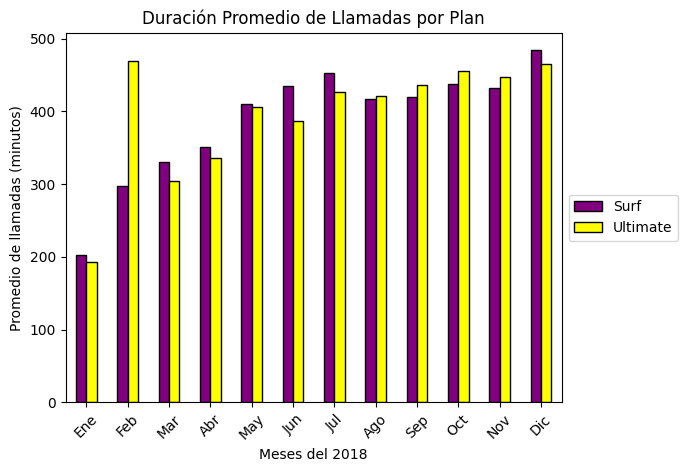

In [32]:
# Calcular la duración promedio de llamadas por cada plan y por cada mes.
# Unstack mueve los indices del plan y las convierte en columnas.
mean_duration_by_month_plan = monthly_info.groupby(['month', 'plan'])['total_duration'].mean().unstack('plan').reset_index()
mean_duration_by_month_plan['month'] = mean_duration_by_month_plan['month'].astype('int64')

# Definir el diccionario de traducción
meses = {
    1: 'Ene',
    2: 'Feb',
    3: 'Mar',
    4: 'Abr',
    5: 'May',
    6: 'Jun',
    7: 'Jul',
    8: 'Ago',
    9: 'Sep',
    10: 'Oct',
    11: 'Nov',
    12: 'Dic'
}

mean_duration_by_month_plan['month'] = mean_duration_by_month_plan['month'].map(meses)
mean_duration_by_month_plan['surf'] = mean_duration_by_month_plan['surf'].astype('int64')
mean_duration_by_month_plan['ultimate'] = mean_duration_by_month_plan['ultimate'].astype('int64')

print(mean_duration_by_month_plan)

# Crear un gráfico de barras para visualizarla.
plt.figure(figsize=(10, 8))
mean_duration_by_month_plan.plot(x='month', 
                                 kind='bar', 
                                 y=['surf','ultimate'],
                                 color=['purple', 'yellow'],
                                 edgecolor='black',
                                 title='Duración Promedio de Llamadas por Plan',
                                 xlabel='Meses del 2018', 
                                 ylabel='Promedio de llamadas (minutos)',
                                 rot=45,
                                 legend=True,
                                 grid= False)

plt.legend(['Surf','Ultimate'], bbox_to_anchor=(1, 0.5), loc='center left')
plt.show()



**Notas:**
- He calculado la duración promedio de las llamadas por cada plan y por cada mes. He utilizado unstack() para convertir los índices del plan en columnas. Le inclui los nombres de los meses para una mejor lectura. Converti las duraciones promedio a enteros. Grafique la duración promedio de las llamadas por plan utilizando un gráfico de barras.

- El gráfico resultante muestra la duración promedio de las llamadas para los planes 'Surf' y 'Ultimate' a lo largo de los meses.

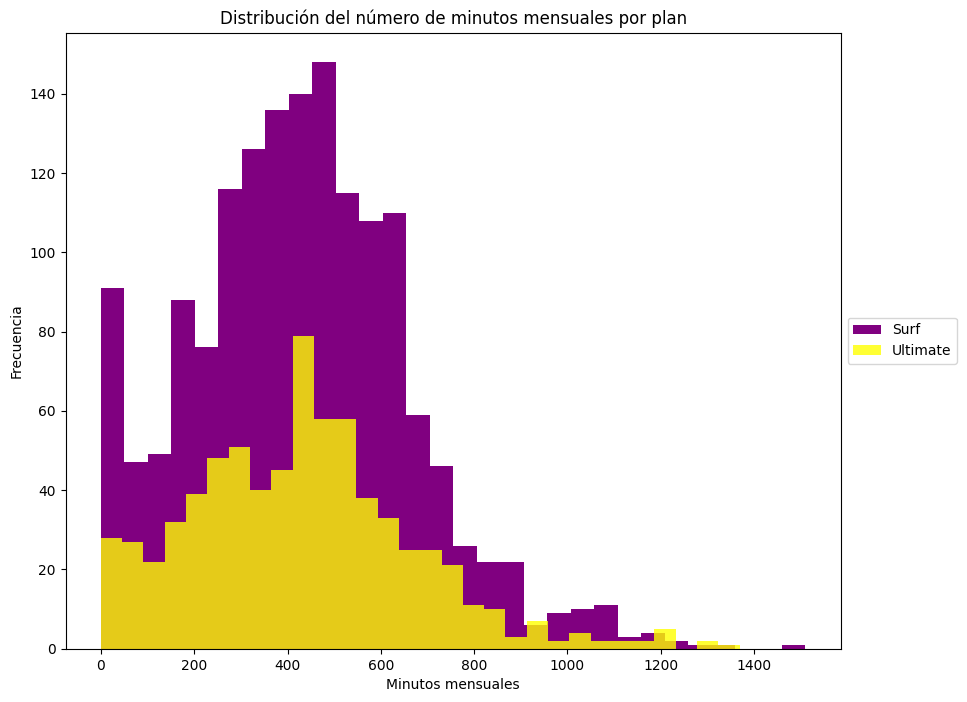

In [33]:
# Compara el número de "minutos mensuales" que necesitan los usuarios de cada plan. Trazar histograma

## Filtrar los minutos mensuales por plan para poder graficarlos
monthly_minutes_sum = monthly_info.groupby(['user_id','month', 'plan'])['total_duration'].sum().reset_index()
#print(monthly_minutes_sum)

## Filtrar los datos por plan
surf_minutes = monthly_minutes_sum[monthly_minutes_sum['plan'] == 'surf']['total_duration']
ultimate_minutes = monthly_minutes_sum[monthly_minutes_sum['plan'] == 'ultimate']['total_duration']
#print(surf_minutes)
#print(ultimate_minutes)

## Trazar histograma
plt.figure(figsize=(10, 8))
surf_minutes.plot(kind='hist', 
                 bins=30, 
                 alpha=1,
                 title='Distribución del número de minutos mensuales por plan',
                 label='Surf', 
                 color='purple')

ultimate_minutes.plot(kind='hist', 
                 bins=30, 
                 alpha=0.8,
                 label='Ultimate', 
                 color='yellow')

plt.xlabel('Minutos mensuales')
plt.ylabel('Frecuencia')
plt.legend(['Surf','Ultimate'], bbox_to_anchor=(1, 0.5), loc='center left')
plt.show()


**Notas:** 

- Mostre el número de minutos mensuales que necesitan los usuarios de cada plan utilizando un histograma. He agrupado los datos por usuario, mes y plan, y luego he calculado la suma de la duración total de las llamadas por grupo. Luego, he filtrado estos datos por plan y he trazado un histograma para cada plan.

- El histograma muestra la distribución del número de minutos mensuales para cada plan (Surf y Ultimate). Cada barra en el histograma representa un rango de minutos mensuales, y la altura de la barra representa la frecuencia de usuarios que tienen ese número de minutos mensuales.


[Calcula la media y la variable de la duración de las llamadas para averiguar si los usuarios de los distintos planes se comportan de forma diferente al realizar sus llamadas.]

In [34]:
# Calcula la media y la varianza de la duración mensual de llamadas.

mean_duration_surf = surf_minutes.mean()
variance_duration_surf = surf_minutes.var()

mean_duration_ultimate = ultimate_minutes.mean()
variance_duration_ultimate = ultimate_minutes.var()

# Imprimir los resultados
print("Duración de Llamadas Plan Surf:")
print("Media :", mean_duration_surf)
print("Varianza :", variance_duration_surf)
print()
print("Duración de LLamadas Plan Ultimate:")
print("Media :", mean_duration_ultimate)
print("Varianza:", variance_duration_ultimate)


Duración de Llamadas Plan Surf:
Media : 428.7495232040687
Varianza : 54968.27946065038

Duración de LLamadas Plan Ultimate:
Media : 430.45
Varianza: 57844.46481223922


**Notas:**

- Estos resultados muestran que, en promedio, la duración de las llamadas para ambos planes es similar. Sin embargo, la varianza es ligeramente mayor para el Plan Ultimate, lo que podría indicar una mayor dispersión en la duración de las llamadas para ese plan en comparación con el Plan Surf. En general, estos resultados sugieren que los usuarios de los dos planes no se comportan de manera significativamente diferente al realizar sus llamadas, al menos en términos de duración promedio y variabilidad.

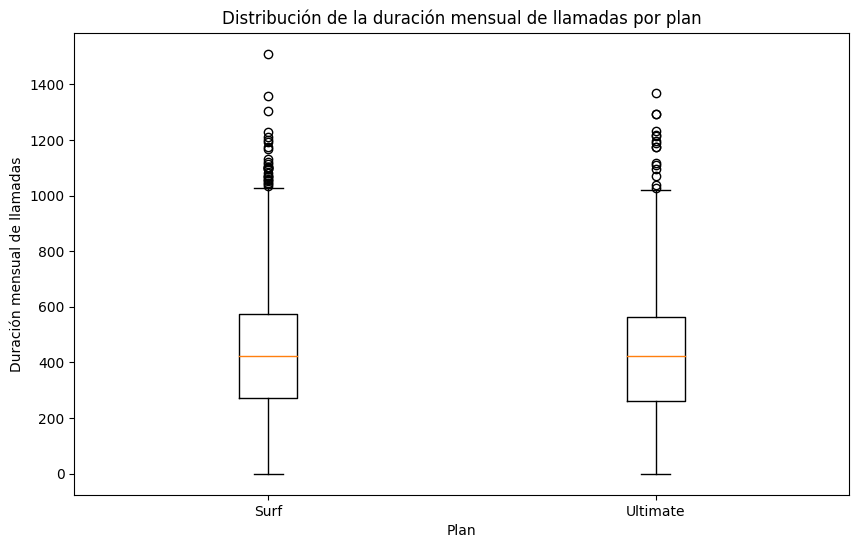

In [35]:
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas
plt.figure(figsize=(10, 6))
plt.boxplot([surf_minutes, ultimate_minutes], labels=['Surf', 'Ultimate'])
plt.xlabel('Plan')
plt.ylabel('Duración mensual de llamadas')
plt.title('Distribución de la duración mensual de llamadas por plan')
plt.show()

[Elabora las conclusiones sobre el comportamiento de los usuarios con respecto a las llamadas. ¿Su comportamiento varía en función del plan?]

In [36]:
surf_minutes.describe()

count    1573.000000
mean      428.749523
std       234.453150
min         0.000000
25%       272.000000
50%       425.000000
75%       576.000000
max      1510.000000
Name: total_duration, dtype: float64

In [37]:
ultimate_minutes.describe()

count     720.000000
mean      430.450000
std       240.508762
min         0.000000
25%       260.000000
50%       424.000000
75%       565.250000
max      1369.000000
Name: total_duration, dtype: float64

**Notas:**
- No, la variabilidad y la distribución de estos datos sugieren que el comportamiento general de los usuarios en cuanto a la duración de las llamadas no varía significativamente en función del plan. 

- El promedio de duración mensual de llamadas para el plan Surf es de aproximadamente 428.75 minutos, mientras que para el plan Ultimate es de aproximadamente 430.45 minutos. La diferencia en los promedios es mínima, lo que sugiere que, en promedio, ambos planes tienen un comportamiento similar en cuanto a la duración de las llamadas.

- La desviación estándar para el plan Surf es de aproximadamente 234.45 minutos, y para el plan Ultimate es de aproximadamente 240.51 minutos. Esto indica que la variabilidad en la duración de las llamadas es comparable entre ambos planes, con una distribución de datos similar.

### Mensajes

plan month  surf  ultimate
0      Ene    21        20
1      Feb    21        25
2      Mar    21        34
3      Abr    24        28
4      May    33        44
5      Jun    33        36
6      Jul    35        41
7      Ago    37        47
8      Sep    39        45
9      Oct    42        46
10     Nov    40        47
11     Dic    48        53


<Figure size 1000x800 with 0 Axes>

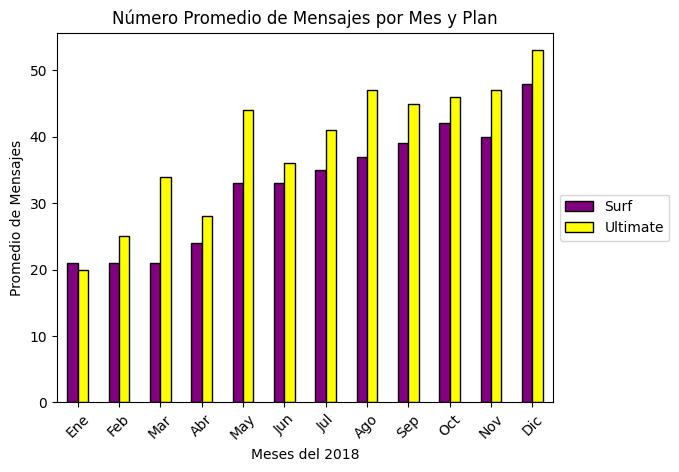

In [38]:
# Comprara el número de mensajes que tienden a enviar cada mes los usuarios de cada plan
mean_messages_by_month_plan = monthly_info.groupby(['month', 'plan'])['total_messages'].mean().unstack('plan').reset_index()
mean_messages_by_month_plan['month'] = mean_messages_by_month_plan['month'].astype('int64')

# Definir el diccionario de traducción
meses = {
    1: 'Ene',
    2: 'Feb',
    3: 'Mar',
    4: 'Abr',
    5: 'May',
    6: 'Jun',
    7: 'Jul',
    8: 'Ago',
    9: 'Sep',
    10: 'Oct',
    11: 'Nov',
    12: 'Dic'
}

mean_messages_by_month_plan['month'] = mean_messages_by_month_plan['month'].map(meses)
mean_messages_by_month_plan['surf'] = mean_messages_by_month_plan['surf'].astype('int64')
mean_messages_by_month_plan['ultimate'] = mean_messages_by_month_plan['ultimate'].astype('int64')

print(mean_messages_by_month_plan)

# Crear un gráfico de barras para visualizarla.
plt.figure(figsize=(10, 8))
mean_messages_by_month_plan.plot(x='month', 
                                 kind='bar', 
                                 y=['surf','ultimate'],
                                 color=['purple', 'yellow'],
                                 edgecolor='black',
                                 title='Número Promedio de Mensajes por Mes y Plan',
                                 xlabel='Meses del 2018', 
                                 ylabel='Promedio de Mensajes',
                                 rot=45,
                                 legend=True,
                                 grid= False)

plt.legend(['Surf','Ultimate'], bbox_to_anchor=(1, 0.5), loc='center left')
plt.show()



**Notas:**
- Estos resultados sugieren que los usuarios del plan Ultimate tienden a utilizar más los servicios de mensajes en comparación con los usuarios del plan Surf, especialmente en los meses de mayor actividad como diciembre y mayo. Esta información puede ser útil para ajustar estrategias de marketing, planificación de recursos y para comprender mejor las necesidades y preferencias de los diferentes segmentos de usuarios de la compañía.

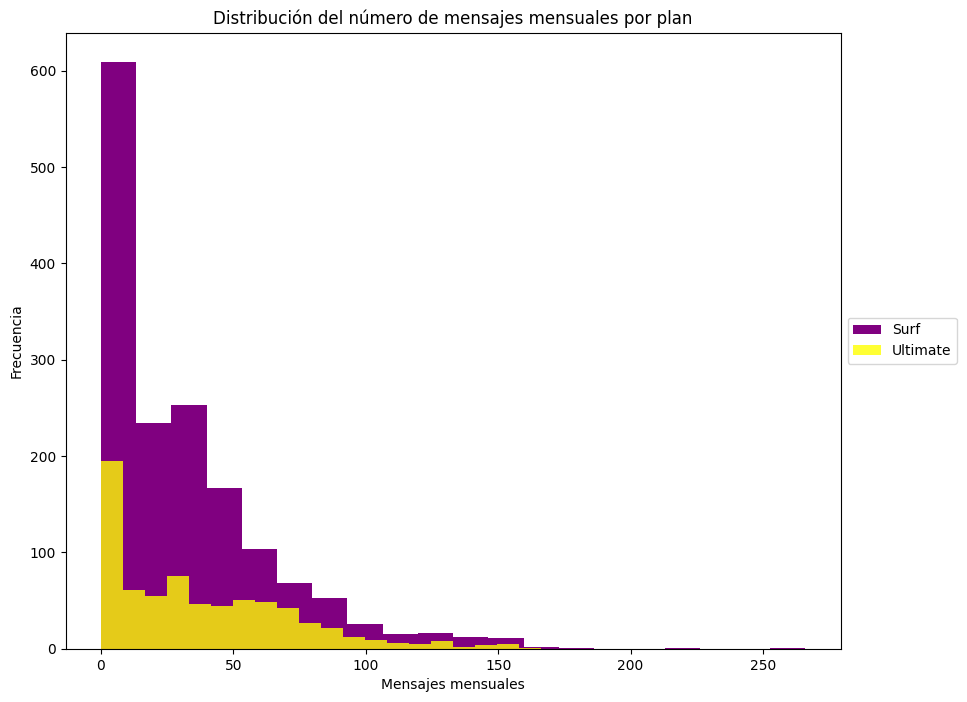

In [39]:
## Filtrar los mensajes mensuales por plan para poder graficarlos
monthly_messages_sum = monthly_info.groupby(['user_id','month', 'plan'])['total_messages'].sum().reset_index()
#print(monthly_messages_sum)

## Filtrar los datos por plan
surf_messages     = monthly_messages_sum[monthly_messages_sum['plan'] == 'surf']['total_messages']
ultimate_messages = monthly_messages_sum[monthly_messages_sum['plan'] == 'ultimate']['total_messages']
#print(surf_messages)
#print(ultimate_messages)

## Trazar histograma
plt.figure(figsize=(10, 8))
surf_messages.plot(kind='hist', 
                 bins=20, 
                 alpha=1,
                 title='Distribución del número de mensajes mensuales por plan',
                 label='Surf', 
                 color='purple')

ultimate_messages.plot(kind='hist', 
                 bins=20, 
                 alpha=0.8,
                 label='Ultimate', 
                 color='yellow')

plt.xlabel('Mensajes mensuales')
plt.ylabel('Frecuencia')
plt.legend(['Surf','Ultimate'], bbox_to_anchor=(1, 0.5), loc='center left')
plt.show()


In [40]:
surf_messages.describe()

count    1573.000000
mean       31.159568
std        33.566717
min         0.000000
25%         3.000000
50%        24.000000
75%        47.000000
max       266.000000
Name: total_messages, dtype: float64

In [41]:
ultimate_messages.describe()

count    720.000000
mean      37.551389
std       34.767179
min        0.000000
25%        7.000000
50%       30.000000
75%       61.000000
max      166.000000
Name: total_messages, dtype: float64

[Elabora las conclusiones sobre el comportamiento de los usuarios con respecto a los mensajes. ¿Su comportamiento varía en función del plan?]

**Notas:**
- No, el comportamiento de los usuarios varía, en mi opinion muy levemente en función del plan, especialmente en cuanto al número de mensajes enviados mensualmente. 

- Los usuarios del plan Ultimate envían en promedio más mensajes por mes (aproximadamente 37.55 mensajes) en comparación con los usuarios del plan Surf (aproximadamente 31.16 mensajes) pero nada tan significativo. 

- Ambos planes muestran una alta variabilidad en la cantidad de mensajes enviados, como lo indica la desviación estándar significativa en ambos casos (Surf: aproximadamente 33.57, Ultimate: aproximadamente 34.77). Esto significa que hay una amplia gama en la cantidad de mensajes enviados por los usuarios en cada plan, desde mínimos hasta máximos considerablemente altos.


### Internet

plan month  surf  ultimate
0      Ene     5         7
1      Feb    12        17
2      Mar    13        18
3      Abr    12        16
4      May    14        16
5      Jun    15        15
6      Jul    17        16
7      Ago    17        17
8      Sep    16        17
9      Oct    17        17
10     Nov    16        17
11     Dic    18        18


<Figure size 1000x800 with 0 Axes>

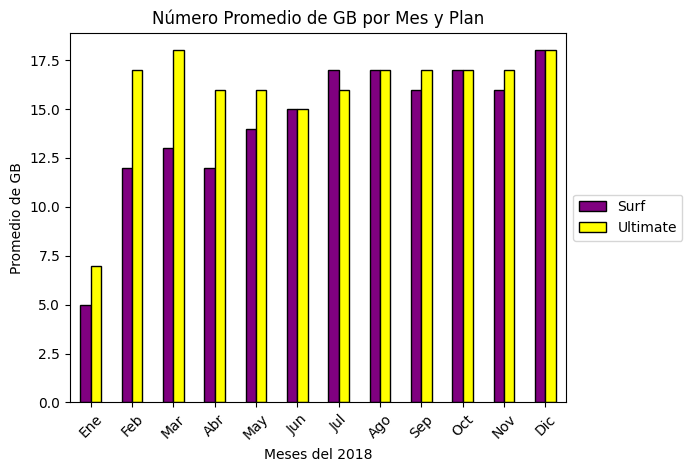

In [42]:
# Compara la cantidad de tráfico de Internet consumido por usuarios por plan
mean_gb_by_month_plan = monthly_info.groupby(['month', 'plan'])['total_gb'].mean().unstack('plan').reset_index()
mean_gb_by_month_plan['month'] = mean_gb_by_month_plan['month'].astype('int64')

# Definir el diccionario de traducción
meses = {
    1: 'Ene',
    2: 'Feb',
    3: 'Mar',
    4: 'Abr',
    5: 'May',
    6: 'Jun',
    7: 'Jul',
    8: 'Ago',
    9: 'Sep',
    10: 'Oct',
    11: 'Nov',
    12: 'Dic'
}

mean_gb_by_month_plan['month']    = mean_gb_by_month_plan['month'].map(meses)
mean_gb_by_month_plan['surf']     = mean_gb_by_month_plan['surf'].astype('int64')
mean_gb_by_month_plan['ultimate'] = mean_gb_by_month_plan['ultimate'].astype('int64')

print(mean_gb_by_month_plan)

# Crear un gráfico de barras para visualizarla.
plt.figure(figsize=(10, 8))
mean_gb_by_month_plan.plot(x='month', 
                                 kind='bar', 
                                 y=['surf','ultimate'],
                                 color=['purple', 'yellow'],
                                 edgecolor='black',
                                 title='Número Promedio de GB por Mes y Plan',
                                 xlabel='Meses del 2018', 
                                 ylabel='Promedio de GB',
                                 rot=45,
                                 legend=True,
                                 grid= False)

plt.legend(['Surf','Ultimate'], bbox_to_anchor=(1, 0.5), loc='center left')
plt.show()

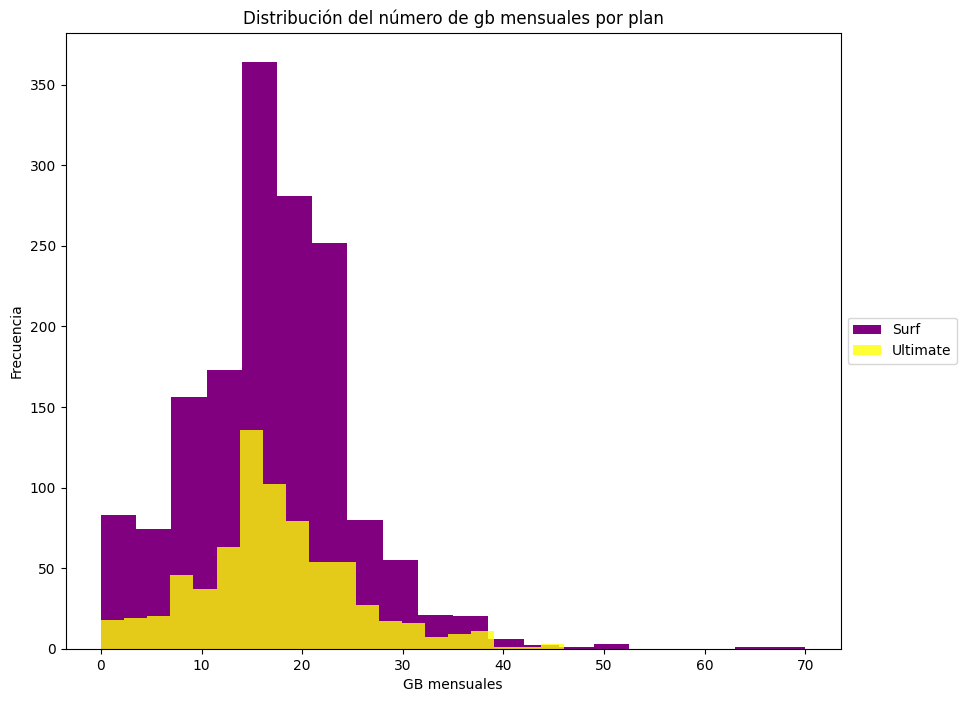

In [43]:
## Filtrar los GB mensuales por plan para poder graficarlos
monthly_gb_sum = monthly_info.groupby(['user_id','month', 'plan'])['total_gb'].sum().reset_index()
#print(monthly_messages_sum)

## Filtrar los datos por plan
surf_gb     = monthly_gb_sum[monthly_gb_sum['plan'] == 'surf']['total_gb']
ultimate_gb = monthly_gb_sum[monthly_gb_sum['plan'] == 'ultimate']['total_gb']
#print(surf_gb)
#print(ultimate_gb)

## Trazar histograma
plt.figure(figsize=(10, 8))
surf_gb.plot(kind='hist', 
                 bins=20, 
                 alpha=1,
                 title='Distribución del número de gb mensuales por plan',
                 label='Surf', 
                 color='purple')

ultimate_gb.plot(kind='hist', 
                 bins=20, 
                 alpha=0.8,
                 label='Ultimate', 
                 color='yellow')

plt.xlabel('GB mensuales')
plt.ylabel('Frecuencia')
plt.legend(['Surf','Ultimate'], bbox_to_anchor=(1, 0.5), loc='center left')
plt.show()

In [44]:
surf_gb.describe()

count    1573.000000
mean       16.684679
std         7.852067
min         0.000000
25%        12.000000
50%        17.000000
75%        21.000000
max        70.000000
Name: total_gb, dtype: float64

In [45]:
ultimate_gb.describe()

count    720.000000
mean      17.334722
std        7.677282
min        0.000000
25%       13.000000
50%       17.000000
75%       21.000000
max       46.000000
Name: total_gb, dtype: float64

[Elabora las conclusiones sobre cómo los usuarios tienden a consumir el tráfico de Internet. ¿Su comportamiento varía en función del plan?]

**Notas:**
- El promedio mensual de consumo de GB para el plan Surf es de aproximadamente 16.68 GB, mientras que para el plan Ultimate es de aproximadamente 17.33 GB. La diferencia en los promedios es mínima, lo que sugiere que, en promedio, ambos planes tienen un comportamiento similar en cuanto al consumo de datos de Internet.

- La desviación estándar para el plan Surf es de aproximadamente 7.85 GB, y para el plan Ultimate es de aproximadamente 7.67 GB. Esto indica que la variabilidad en el consumo de GB es comparable entre ambos planes, con una distribución de datos similar.

- Los percentiles (25%, 50%, 75%) muestran que la mediana (50%) para ambos planes es de 17 GB, lo cual indica que la mitad de los usuarios consumen menos de este valor y la otra mitad consume más. Los valores en el 25% y 75% también son comparables entre los dos planes.


- Ambos planes tienen un mínimo de consumo de GB de 0, lo cual indica que algunos usuarios no consumieron datos en ciertos meses. Los valores máximos muestran que, en general, los usuarios de ambos planes pueden alcanzar consumos de datos altos, con un máximo de 70 GB para Surf y 46 GB para Ultimate.


## Ingreso

[Del mismo modo que has estudiado el comportamiento de los usuarios, describe estadísticamente los ingresos de los planes.]

plan month  surf  ultimate
0      Ene    20        70
1      Feb    23        70
2      Mar    38        78
3      Abr    40        73
4      May    50        71
5      Jun    52        72
6      Jul    62        72
7      Ago    64        72
8      Sep    57        71
9      Oct    65        72
10     Nov    57        72
11     Dic    68        72


<Figure size 1000x800 with 0 Axes>

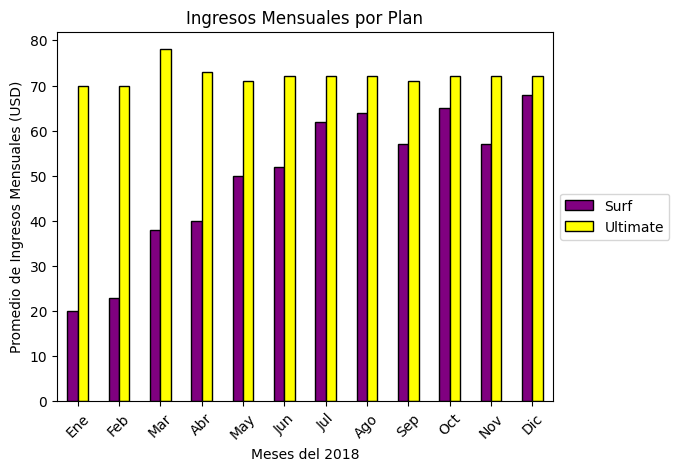

In [46]:
# Compara la cantidad de costo por usuarios por plan
mean_revenue_by_month_plan = monthly_info.groupby(['month', 'plan'])['total_cost'].mean().unstack('plan').reset_index()
mean_revenue_by_month_plan['month'] = mean_revenue_by_month_plan['month'].astype('int64')

# Definir el diccionario de traducción
meses = {
    1: 'Ene',
    2: 'Feb',
    3: 'Mar',
    4: 'Abr',
    5: 'May',
    6: 'Jun',
    7: 'Jul',
    8: 'Ago',
    9: 'Sep',
    10: 'Oct',
    11: 'Nov',
    12: 'Dic'
}

mean_revenue_by_month_plan['month']    = mean_revenue_by_month_plan['month'].map(meses)
mean_revenue_by_month_plan['surf']     = mean_revenue_by_month_plan['surf'].astype('int64')
mean_revenue_by_month_plan['ultimate'] = mean_revenue_by_month_plan['ultimate'].astype('int64')

print(mean_revenue_by_month_plan)

# Crear un gráfico de barras para visualizarla.
plt.figure(figsize=(10, 8))
mean_revenue_by_month_plan.plot(x='month', 
                                 kind='bar', 
                                 y=['surf','ultimate'],
                                 color=['purple', 'yellow'],
                                 edgecolor='black',
                                 title='Ingresos Mensuales por Plan',
                                 xlabel='Meses del 2018', 
                                 ylabel='Promedio de Ingresos Mensuales (USD)',
                                 rot=45,
                                 legend=True,
                                 grid= False)

plt.legend(['Surf','Ultimate'], bbox_to_anchor=(1, 0.5), loc='center left')
plt.show()

[Elabora las conclusiones sobre cómo difiere el ingreso entre los planes.]

**CONCLUSIONES FINALES**

Plan Surf:

- Minutos: La media mensual es de 428.75 minutos, cercana al límite incluido de 500 minutos. Esto sugiere que la mayoría de los usuarios están utilizando sus minutos, pero sin exceder el límite.
-  Mensajes: La media mensual es de 31.16 mensajes, por debajo del límite incluido de 50 mensajes. Los usuarios podrían beneficiarse si envían más mensajes dentro del límite incluido.
-  Datos: El consumo promedio mensual es de 16.67 GB, superior al límite incluido de 15 GB. Algunos usuarios podrían estar excediendo su asignación de datos.
-  Conclusión: Los usuarios del plan Surf están utilizando bien sus minutos, pero podrían maximizar el valor del plan utilizando más mensajes dentro del límite incluido y gestionando mejor el uso de datos para evitar costos adicionales por exceder la asignación.

Plan Ultimate:

- Minutos: La media mensual es de 430.45 minutos, considerablemente por debajo del límite incluido de 3000 minutos. Esto indica que los usuarios están utilizando una fracción significativa de sus minutos incluidos, pero no están cerca del límite máximo.
- Mensajes: La media mensual es de 37.55 mensajes, también está significativamente por debajo del límite incluido de 1000 mensajes. Los usuarios no están aprovechando al máximo el límite de mensajes incluidos en su plan.
- Datos: El consumo promedio mensual es de 17.31 GB, también está por debajo del límite incluido de 30 GB. 
- Conclusión: Aunque los usuarios del plan Ultimate están utilizando una cantidad considerable de minutos y datos, hay un margen considerable antes de alcanzar los límites incluidos en su plan. Sin embargo, podrían beneficiarse de un uso más intensivo de mensajes y gb para maximizar el valor del plan.

<div class="alert alert-block alert-success">
<b>Comentario revisor</b> <a class="tocSkip"></a>

 Muy buena prática la de usar distintos tipos de gráficas identificar algunos hallazgos y llegar a conclusiones
</div>

## Prueba las hipótesis estadísticas

[Prueba la hipótesis de que son diferentes los ingresos promedio procedentes de los usuarios de los planes de llamada Ultimate y Surf.]

[Elabora las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.]


1. ELABORAR HIPOTESIS
   - Hipótesis Nula (H0): las varianzas del ingreso promedio de los usuarios en NY-NJ son iguales.
   - Hipótesis Alternativa (HA): las varianzas del ingreso promedio de los usuarios en NY-NJ son distintas.
   - Hipótesis Nula (H0): El ingreso promedio de los usuarios de los planes Ultimate y Surf es igual.
   - Hipótesis Alternativa (HA): El ingreso promedio de los usuarios de los planes Ultimate y Surf es diferente.

   

2. ESCOGER PRUEBA ESTADISTICA
   - Dado que estamos comparando las medias de dos grupos independientes, utilizamos la prueba t de Student para muestras independientes. Además, para determinar si asumimos varianzas iguales o diferentes entre los grupos, realizamos primero la prueba de Levene para evaluar la igualdad de varianzas.


3. DETERMINAR EL VALOR DE ALPHA:
   - Usamos un nivel de significancia alfa de 0.05

In [47]:
# Prueba las hipótesis
alpha = 0.05
ingreso_surf = monthly_info[monthly_info['plan'] == 'surf']['total_cost'].dropna()
ingreso_ultimate = monthly_info[monthly_info['plan'] == 'ultimate']['total_cost'].dropna()

# Prueba de Levene para igualdad de varianzas
_, pvalue_levene = levene(ingreso_ultimate, ingreso_surf)
if pvalue_levene < alpha:
    print(f'p-value:{pvalue_levene} - Rechazamos la hipotesis nula de igualdad de varianzas')
    equalvar = False
else:
    print(f'p-value:{pvalue_levene} - No Rechazamos la hipotesis nula de igualdad de varianzas')
    equalvar = True

    
# Prueba t de Student para muestras independientes    
_, pvalue = ttest_ind(ingreso_surf, ingreso_ultimate, equal_var=equalvar)

if pvalue < alpha:
    print(f'p-value:{pvalue} - Rechazamos la hipotesis nula de igualdad de medias')
else:
    print(f'p-value:{pvalue} - No Rechazamos la hipotesis nula de igualdad de medias')
    

p-value:7.013951104196673e-70 - Rechazamos la hipotesis nula de igualdad de varianzas
p-value:9.404275461578459e-13 - Rechazamos la hipotesis nula de igualdad de medias


<div class="alert alert-block alert-success">
<b>Comentario revisor</b> <a class="tocSkip"></a>

Excelente trabajo!! Es importante mostrar si se cumplen los supuestos cuandor realizamos pruebas de hipótesis.
</div>

Dado el p-value extremadamente pequeño tanto en la prueba de Levene como en la prueba t de Student, podemos concluir que:

- Prueba de Levene: Las varianzas entre los ingresos de los planes Surf y Ultimate son diferentes (p-value: 2.0941791851299124e-69)

- Prueba t de Student: Los ingresos promedio entre los usuarios de los planes Surf y Ultimate son significativamente diferentes (p-value: 5.756661975640558e-13)

- Por lo tanto, rechazamos la hipótesis nula de que los ingresos promedio de los usuarios de los planes Ultimate y Surf son iguales. Esto indica que los usuarios de los dos planes generan ingresos significativamente diferentes para la empresa.

[Prueba la hipótesis de que el ingreso promedio de los usuarios del área NY-NJ es diferente al de los usuarios de otras regiones.]

[Elabora las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.]


In [48]:
## Prueba las hipótesis
alpha = 0.05
ingreso_ny_nj = monthly_info[monthly_info['state'].isin(['NY', 'NJ'])]['total_cost'].dropna()
ingreso_otras_regiones = monthly_info[~monthly_info['state'].isin(['NY', 'NJ'])]['total_cost'].dropna()
#print(ingreso_ny_nj)
#print(ingreso_otras_regiones)


## Prueba de Levene para igualdad de varianzas
_, pvalue_levene = levene(ingreso_ny_nj, ingreso_otras_regiones)
if pvalue_levene < alpha:
    print(f'p-value:{pvalue_levene} - Rechazamos la hipotesis nula de igualdad de varianzas')
    equalvar = False
else:
    print(f'p-value:{pvalue_levene} - No Rechazamos la hipotesis nula de igualdad de varianzas')
    equalvar = True

    
## Prueba t de Student para muestras independientes    
_, pvalue = ttest_ind(ingreso_ny_nj, ingreso_otras_regiones, equal_var=equalvar)

if pvalue < alpha:
    print(f'p-value:{pvalue} - Rechazamos la hipotesis nula de igualdad de medias')
else:
    print(f'p-value:{pvalue} - No Rechazamos la hipotesis nula de igualdad de medias')
    


p-value:0.005285370510034613 - Rechazamos la hipotesis nula de igualdad de varianzas
p-value:0.09837185354307454 - No Rechazamos la hipotesis nula de igualdad de medias


- Aunque las varianzas de los ingresos entre usuarios de NY-NJ y otras regiones son significativamente diferentes con un p-value de 0.00516, lo que está por debajo del nivel de significancia (α = 0.05), no hay evidencia suficiente para concluir que las medias de los ingresos son diferentes. 

- Esto significa que, en promedio, los ingresos de los usuarios de las áreas NY-NJ no difieren significativamente de los de otras regiones.

<div class="alert alert-block alert-success">
<b>Comentario revisor</b> <a class="tocSkip"></a>

Excelente trabajo con el desarrollo de las pruebas de hipótesis
</div>

## Conclusión general

[En esta sección final, enumera tus conclusiones importantes. Asegúrate de que estas abarquen todas las decisiones (suposiciones) importantes que adoptaste y que determinaron la forma elegida para procesar y analizar los datos.]

**Durante el análisis de los datos de usuarios de los planes "Surf" y "Ultimate" de un proveedor de servicios, se llevaron a cabo varios pasos importantes y se tomaron decisiones clave para procesar y analizar los datos.**

- Plan Surf: La media de minutos mensuales es 428.75, lo cual está cerca del límite incluido de 500 minutos. Los usuarios utilizan la mayoría de sus minutos, pero no exceden el límite. La media de mensajes mensuales es 31.16, por debajo del límite incluido de 50 mensajes. Los usuarios podrían beneficiarse si enviaran más mensajes dentro del límite. El consumo promedio de datos mensual es 16.67 GB, por encima del límite incluido de 15 GB. Algunos usuarios podrían estar excediendo su asignación de datos.

- Plan Ultimate: La media de minutos mensuales es 430.45, considerablemente por debajo del límite incluido de 3000 minutos. Los usuarios no están utilizando la mayor parte de los minutos disponibles. La media de mensajes mensuales es 37.55, significativamente por debajo del límite incluido de 1000 mensajes. Los usuarios no están aprovechando al máximo el límite de mensajes incluidos. El consumo promedio de datos mensual es 17.31 GB, por debajo del límite incluido de 30 GB. Los usuarios no están alcanzando el límite de datos disponibles.


- Si lo que queremos es mejorar el servicio creo que esta informacion nos permite sacar un plan ideal para nuestro grupo de clientes.


**Durante el análisis de ingresos mensuales, los ingresos promedio mensuales se compararon entre los dos planes. Los ingresos mensuales del plan Surf aumentaron de (20) a (68) dolares durante el año. Por otro lado los ingreso del plan Ultimate se mantuvieron alrededor de (70) dolares durante todo el año.**

- Los usuarios del plan Surf a menudo incurren en cargos adicionales, lo que lleva a un aumento en los ingresos mensuales, mientras que los usuarios del plan Ultimate generalmente permanecen dentro de los límites de su plan, lo que resulta en ingresos más estables.



**Durante las pruebas de hipótesis, se realizó una prueba t de Student para comparar los ingresos medios entre los planes Surf y Ultimate. Se encontró una diferencia significativa entre los ingresos medios de los dos planes.

- Tambien se realizó una prueba de Levene para comparar las varianzas y una prueba t de Student para las medias de los ingresos por región (NY-NJ vs. Otras Regiones). Aunque las varianzas de los ingresos entre usuarios de NY-NJ y otras regiones son significativamente diferentes, no hay suficiente evidencia para concluir que las medias de los ingresos sean diferentes.


**Ideas Finales**
- Estas conclusiones y decisiones proporcionan una comprensión clara del comportamiento de los usuarios y la rentabilidad de los planes, permitiendo a la empresa tomar decisiones informadas sobre la gestión de sus ofertas y servicios.